<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Data Analysis and Visualization</div>

# Correlation and Regression part II


Correlation and regression analysis are fundamental to data science AND to statistical analysis. Many statistical tests on parametric data are simply extensions of linear regression. In this notebook we will dive a little deeper into correlation and regression analyses. 

## Correlation vs. Regression

**Correlation** is a measure of association between two variables, while **regression** implies a model in which we predict one value based on the value of another. Regression therefore assumes an independent x value that is used to predict a dependent y value. One of the *assumptions* of regression analysis is that x is measured without error, or in other words that x values are 'true' while y variables contain some degree of measurement error. On top of this measurement error is any difference in the y variable that is caused by factors that are not included in our model. The distances of the observed points (represented by the scatterplot) from the model (represented by the regression line) are known as the **residuals** of the regression analysis. The regression line itself (defined by slope and intercept) is the line that minimizes the total squared distance of the observations from the line. This most typical type of regression is therefore known as a **least squares regression**. 

Let's take a look at a very simple dataset based on this model. In this data, let's assume that we are studying the performance of a particular physiological task `perf` and that we are hypothesizing that this performance is dependent on the concentration of a particular chemical `conc`. We will scale both from 1 to 10. 

Create the data:

In [10]:
import numpy as np

perf = np.zeros(10)
conc = list(range(1,11))

for i in range(10):
    perf[i] = conc[i] + (np.random.normal(0, 1))

print(conc[i])
print('conc (x) = ', conc)
print('perf (y) = ', perf)

10
conc (x) =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
perf (y) =  [-7.43939387  4.06053567  3.65783061  0.36693949 12.07487558 14.63999665
 18.16131038  5.59922736  5.85739918 10.29561072]


And now run the regression analysis and plot it. Note the various values from the regression analysis that are contained within our linregress object. 

LinregressResult(slope=1.4415048687143919, intercept=-1.2008435998999296, rvalue=0.5888556033643727, pvalue=0.07328047438538066, stderr=0.6995225368032423, intercept_stderr=4.340423194871932)


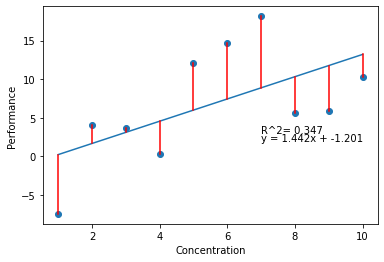

In [11]:
from scipy import stats 
import matplotlib.pyplot as plt


results = stats.linregress(conc,perf)       # This creates the regression object
print(results)

plt.ylabel('Performance')

plt.xlabel('Concentration')

plt.scatter(conc,perf)

xs = [min(conc), max(conc)]
ys = [min(conc) * results.slope + results.intercept, max(conc) * results.slope + results.intercept]
plt.plot(xs, ys)

for i in range(len(conc)):
    xs = [conc[i],conc[i]]
    ys = [perf[i], conc[i]*results.slope + results.intercept]
    plt.plot(xs, ys, color = 'red')

r2_text = 'R^2= ' + "{:.3f}".format(results.rvalue**2)
eq_text = 'y = ' + "{:.3f}".format(results.slope) + 'x + ' + "{:.3f}".format(results.intercept)

plt.text(7,3, r2_text)
plt.text(7,2, eq_text)

plt.show()


### Questions:

What did the following line of code do when we were defining the dataset (be specific):
```
for i in range(10):
    perf[i] = conc[i] + np.random.normal(0, 1) 
```
What do the red lines represent on the graph?

* 
* 
* 





What do you predict would happen if we modified the code above to:
```
for i in range(10):
    perf[i] = conc[i] + np.random.normal(0, 5) 
 ```
What do you predict will happen? What do you observe if you make that change and rerun both code windows above? Be specific about the redlines and the R^2 value. 

* 
* 
* 




## Residuals 

The red lines in the diagram above are known as **residuals**. Residuals are defined as <a href='https://statdictionary.com/basic_stat_terms/r/residual/'>the difference between an observed value of a variable and its predicted value</a>. As we mentioned above regression is a *model* of how the world works.  In this model of the world, if we know the value of *x* we can predict the value of *y*. Residuals are therefore a measure of how accurate that prediction is, or in other terms, how much of the variation in the data remains unexplained by our model. A model with high R^2 values will have small residuals, and vice versa. R^2 can be thought of us as the percentage of the variance in our model that is explained by the relationship between *x* and *y*. 

We can extract the residuals from a regression with the following code

[-7.68005514  2.37836953  0.5341596  -4.19823638  6.06819484  7.19181104
  9.2716199  -4.73196799 -5.91530104 -2.91859436]


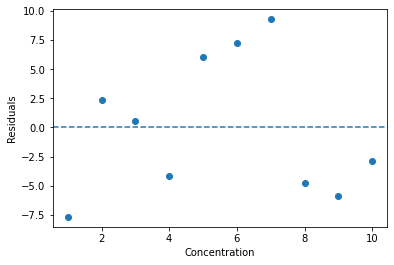

In [38]:
residuals = np.zeros(10)

for i in range(10):
    residuals[i] = perf[i]-(results.intercept + results.slope * conc[i])
    
plt.scatter(conc, residuals)
plt.axhline(y=0, linestyle = 'dashed')
plt.ylabel('Residuals')
plt.xlabel('Concentration')

print(residuals)



There is a cheatcode version of the residuals plot in `seaborn`:
    


<AxesSubplot:>

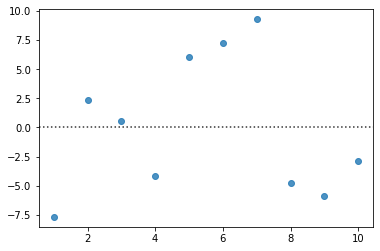

In [45]:
import seaborn as sns
sns.residplot(x= conc, y = perf)

## Parametric Stats and the Assumptions of Regression Models

Regression models are at the root of many different kinds of statistical analysis. In this class we will focus on parametric statistics, in which we generally assume that the data we are analyzing is drawn from a normal distribution. 

As we move through the different statistical tests we are going to see that each one depends on certain assumptions. Specifically the assumptions of a simple linear regression are that:
* *x and y have a linear relationship
* x values are measured without error, all error is in the y variable
* the y responses are indpendent of one another (specifically, the errors or residuals are uncorrelated). In practical terms, this would mean that the residuals would get larger as the x values get larger (the most common pattern) or the opposite would be true. If errors are normal, residuals should be evenly scattered around 0.
* the data comes from a normal distribution (specifically, that the residuals are normally distributed). If the data are from a normal distribution, the errors will be uncorrelated as well, by definition. 

And there are two more assumptions that are relevant when there is more than one predictor variable. These aren't going to be very relevant to us yet but completeness they are:
* If you have more than one predictor variables, they aren't correlated
* *This is just an extension of the first assumption, but if there is more than one predictor variable, the y is a function of 'linear combinations' of the predictors.


### Exercise 1

Run the code below to generate a dataset that compares 'calendar age' to a persons 'health age', then run a regression and create a scatter plot showing the R^2 value and a residuals plot for that data. Interpret the residuals plot. Does the data meet the assumptions of linear regression?

In [120]:
# Run this code to generate the dataset. Don't focus on interpreting this equation for outcome, focus on the data. 

outcome = np.zeros(250)
age = np.random.randint(18,65,250)
random = np.random.normal(0,5, 250)
outcome = (age + random*(2*age/36))

#
## Your code here
#



Provide your interpretation of the results below:
* 
* 
* 

<AxesSubplot:>

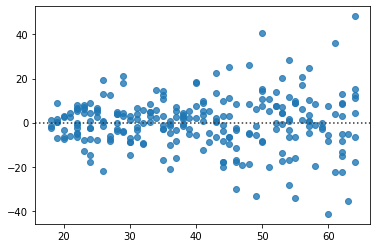

In [121]:
sns.residplot(x= age, y = outcome)

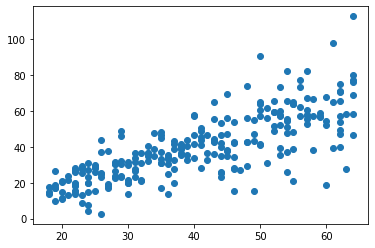

In [122]:
plt.scatter(age, outcome)

Another *assumption* of regression analysis makes an assumption 

## Exercise 2 

A new dataset for doing exploratory data analysis is the <a href = 'https://allisonhorst.github.io/palmerpenguins/articles/intro.html'>penguin dataset</a> based on the work of Kristin Gorman (Horst, Hill, and Gorman, 2020). Use body mass as an x variable assuming that it is an errorless measure of penguin size. I have added it to this module as `penguins.csv` in the data folder. Load this dataset into a pandas dataframe and then create the following:

1. a 3-panel scatterplot showing the relationship of all three morphological variables to body size. Make sure that different species can be compared on your plots
1. Pick the relationship between size and morphology that seems most different among penguin species. Use regression analyses to compare the relationships between morphology and size among species. Plot the relationships and indicate the R^2 value for each regression. 
1. For the relationship you have chosen test the assumptions of your regression analysis using a residuals plot. 




In [ ]:
#
## Your code here
#

In [ ]:
#
## Your code here
#

In [ ]:
#
## Your code here
#

![TJU logo image](images/TJU_logo_image.png "TJU logo image")

## Data source citation

Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
Archipelago (Antarctica) penguin data. R package version 0.1.0.
https://allisonhorst.github.io/palmerpenguins/. doi:
10.5281/zenodo.3960218.